# Çok Özellikli Lineer Regressyon
Çok özellikli lieer regresyon tek özellikli lieer regresyonunn aksine hedef değeri etkileyen birden fazla etmenin bulunduğu durumlarda kullanılır ki gerçek hayat problemlerinin çoğu böyledir. Lineer regresyon algoritmamızda kullandığımız doğrusal fonksiyonumuzu hatırlayacak olursak;
$$ f_{\mathbf{w},b}(x^i)= wx^i+b $$
şeklindedir. 
Burada $i$ ifadesi girdinin indexini ifade eder. Çok özellikli lineer regresyon için kullanacağımız doğrusal fonksiyonumuz a bakacak olursak;
$$ f_{\mathbf{w},b}(x^i)= \sum(w_jx^i_j) + b $$
şeklindedir. Burada $i$ ifadesi basit lineer regresyon algoritma kullandığımız gibi `girdi indexi` $j$ ifadesi `özellik indexi` ifade eder.

Basit lineer regresyon algoritmamızda olduğu gibi bu ifadeleri ev satış fiyatı tahmini için kullanacağamız çok değişkenli lieer regresyon algoritmamızı anlayabilmek için eğitim veri seti üzerinde inceleyelim.
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | `35`           | 178           |   

Bu veri setinde görmüş olduğunuz gibi evlerin fiyatları haricindeki ( Evlerin fiyatları bizim için hedef değerdir. $y$) her bir sütun bir özelliği ve her bir satır bir girdiyi iafde etmektedir. Yani $x^3_4$ = 35 olacaktır. ( Matematiksel olarak indek değerleri 1' den dizinin boyutu olan $n$' e kadar sıralanır fakat bilgisayar bilimlerinde index değeri 0' dan başlar ve $n - 1$' e kadar gider.)

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

`x_tarin` değişkeni matris formuna sahip bir vektördür ve bu matrisi bilgisayar bilimlerindeki notasyon gereğince indexlerini 0' dan başlatıp modelleyecek olursak;
$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
Burada notasyonu daha iyi kavratabilmek açısından;
- $x^(i)$ ifadesinde bulunan $i$ her girdiye ait olan index değerini ifade eder.  $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^(i)_j$ ifadesinde bulunan $j$ her bir özelliğe ait olan index değerini ifade eder. 


In [2]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


## Doğrusal Fonksiyonun Parametreleri
Hatırlanacağı üzere doğrusal fonkiyonun parametrelri $w,b$'dir. Bu parametrelerin çok özellikli lineer regresyon algoritmasında ifade biçimi;
$$ f_{\mathbf{w}b} = \sum(w_jx^i_j)+b = w_0x^{(0)}_{0} + w_1x^{(0)}_{1} + w_2x^{(0)}_{2} + ... + w_{n-1}x^{(0)}_{n-1}+ w_0x^{(1)}_{0} + w_1x^{(1)}_{1} + w_2x^{(1)}_{2} + ... +  w_{n-1}x^{(1)}_{n-1}+ ... + w_0x^{(m-1)}_{0} + w_1x^{(m-1)}_{1} + w_2x^{(m-1)}_{2} + ... +  w_{n-1}x^{(m-1)}_{n-1} + b$$
şeklindedir.

Bu durumda görmüş olduğunuz gibi $w$' de $x$ gibi vektörel bir ifadedir. $w$ vektörel anlamda gösterimi;
$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
şeklindedir.
- Özellik sayısı kadar $w$ değeri bulunmaktadır. Bu da $w$ sayısının $X$ matrisinin sütun sayısına eşit olduğunu ifade etmektedir.
- $b$ parametresi ise basit doğrusal regresyon algoritmasinda olduğu gibi vektörel değil skaler bir büyüklüktür.


In [3]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


## Vektörel Gösterim
Bu bakımdan çok özellikli lineer regresyonda kullanacağımız doğrusal fonksiyonumuzu $x$ ve $w$ değerlerinin birer vektör olmaları dolayısıyla vektörel çarpım şeklinde ifade edecek olursak;
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $$
şeklinde gösterebiliriz.

Çok özellikli lineer regresyon algoritmamızı kendi atadığımız $w$ ve $b$ parametrelerine göre hesaplamak için kullanacağımız kod dizisi;

In [4]:
def linearFunction(x,w,b):
    f = 0
    m = x.shape[0]
    for i in range(m):
        f += w * x[i] 
    f += b
    return f


şeklindedir. Bu hesaplama işlemini vektörel olarak yapabilmek için;

In [5]:
f = linearFunction(X_train,w_init,b_init)
print(f)

[ 2496.099287     972.7188109    571.73983868 -2385.3768048 ]


kodunu yazarız.

## Çok Özellik için Maliyet Hesaplama
Çok özellik için maliyet fonksiyonumuz;
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 
şeklinde ifade edilir.

In [6]:
def costFunction(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2
    cost /= 2*m
    return cost

In [7]:
cost = costFunction(X_train, y_train, w_init, b_init)
print(f'Maliyet : {cost}')

Maliyet : 1.5578904045996674e-12


## Çok özellik için Gradyan İnişi
Çok özellik için gradyan inişi algoritmasının ifadesi;
$$\begin{align*} \text{yakınsayana}&\text{ kadar tekrarla:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$
şeklindedir. Bu ifadelerin kendi içlerindeki çözümleri ise;
$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$
şeklindedir. İfadeleri yeniden düznleyecek olursak;
$$ w_j = w_j -  \alpha\frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  $$
$$ b = b -  \alpha\frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) $$
biçimini alacaklardır.

In [8]:
def computeGradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw, dj_db

In [9]:
tmp_dj_dw, tmp_dj_db = computeGradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]


In [10]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):  
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        dj_dw,dj_db = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw              
        b = b - alpha * dj_db               
      
       
        if i<100000:      
            J_history.append(cost_function(X, y, w, b))


        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

In [18]:
initial_w = np.zeros_like((w_init))
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,costFunction, computeGradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m= X_train.shape[0]
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


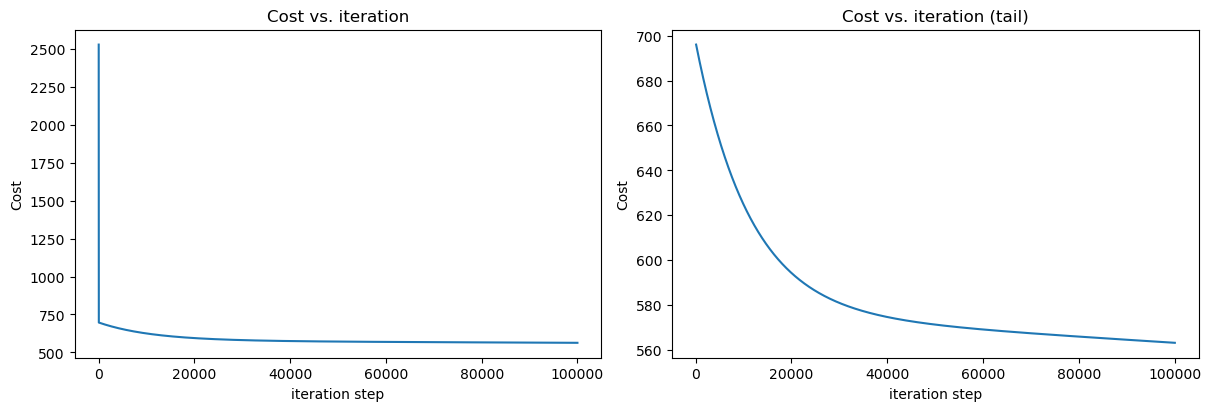

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()